> Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

> Load and Explore Dataset

In [2]:
df = pd.read_csv('./data/StudentsPerformance.csv')
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


> Data Cleaning

Checking for Missing Values

In [4]:
missing_table = pd.DataFrame({
    'Has Missing': df.isnull().any(),
    'Missing Count': df.isnull().sum()
})
missing_table

,Has Missing,Missing Count
gender,False,0
race/ethnicity,False,0
parental level of education,False,0
lunch,False,0
test preparation course,False,0
math score,False,0
reading score,False,0
writing score,False,0


There is no such missing values in the columns.

Checking for Duplicate Rows, remove if any

In [5]:
df.duplicated().sum()

np.int64(0)

There is no Duplicate Rows as such.

> Standardizing Categorical Data: Unify formats (e.g., capitalization, spelling) for columns like "gender" or "parental level of education".

In [6]:
before_counts = {}
for col in df.select_dtypes(include='object').columns:
    before_counts[col] = pd.Series(df[col].value_counts())

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower().str.strip()

after_counts = {}
for col in df.select_dtypes(include='object').columns:
    after_counts[col] = pd.Series(df[col].value_counts())

comparison_tables = {}
for col in df.select_dtypes(include='object').columns:
    comparison_tables[col] = pd.DataFrame({
        'Before': before_counts[col],
        'After': after_counts[col]
    }).fillna(0).astype(int)

for col, table in comparison_tables.items():
    print(f"Column: {col}")
    display(table)

Column: gender


,Before,After
gender,,
female,518,518
male,482,482


Column: race/ethnicity


,Before,After
race/ethnicity,,
group A,89,0
group B,190,0
group C,319,0
group D,262,0
group E,140,0
group a,0,89
group b,0,190
group c,0,319
group d,0,262


Column: parental level of education


,Before,After
parental level of education,,
some college,226,226
associate's degree,222,222
high school,196,196
some high school,179,179
bachelor's degree,118,118
master's degree,59,59


Column: lunch


,Before,After
lunch,,
standard,645,645
free/reduced,355,355


Column: test preparation course


,Before,After
test preparation course,,
none,642,642
completed,358,358


> Checking for Outliers

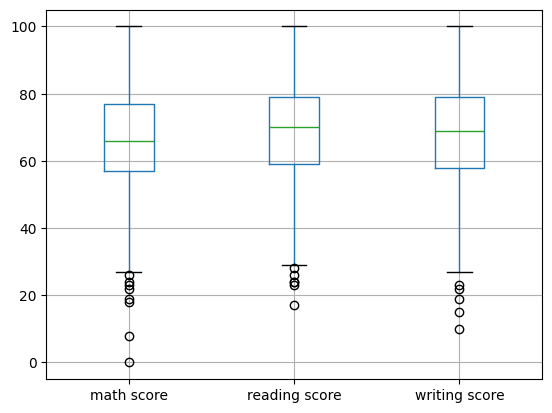

In [7]:
df[['math score', 'reading score', 'writing score']].boxplot()
plt.show()

In [8]:
df['math_zscore'] = zscore(df['math score'])
df['reading_zscore'] = zscore(df['reading score'])
df['writing_zscore'] = zscore(df['writing score'])
outliers_z = df[(df['math_zscore'] > 3) | (df['math_zscore'] < -3) |
                (df['reading_zscore'] > 3) | (df['reading_zscore'] < -3) |
                (df['writing_zscore'] > 3) | (df['writing_zscore'] < -3)]
display(outliers_z)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_zscore,reading_zscore,writing_zscore
17,female,group b,some high school,free/reduced,none,18,32,28,-3.173040,-2.547062,-2.637204
59,female,group c,some high school,free/reduced,none,0,17,10,-4.360728,-3.574960,-3.822345
76,male,group e,some high school,standard,none,30,26,22,-2.381248,-2.958221,-3.032251
327,male,group a,some college,free/reduced,none,28,23,19,-2.513214,-3.163801,-3.229774
596,male,group b,high school,free/reduced,none,30,24,15,-2.381248,-3.095274,-3.493139
787,female,group b,some college,standard,none,19,38,32,-3.107058,-2.135903,-2.373839
980,female,group b,high school,free/reduced,none,8,24,23,-3.832867,-3.095274,-2.966410


We found some outliers using z score.

> Visualizing the data

In [9]:
passing_score = 40
failures = {
    'math score': df[df['math score'] < passing_score].shape[0],
    'reading score': df[df['reading score'] < passing_score].shape[0],
    'writing score': df[df['writing score'] < passing_score].shape[0]
}
failures

{'math score': 40, 'reading score': 26, 'writing score': 32}

C:\Users\SubudhiK\AppData\Local\Temp\ipykernel_5536\2775845801.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(x="math_score_bin", data=df, palette="muted")


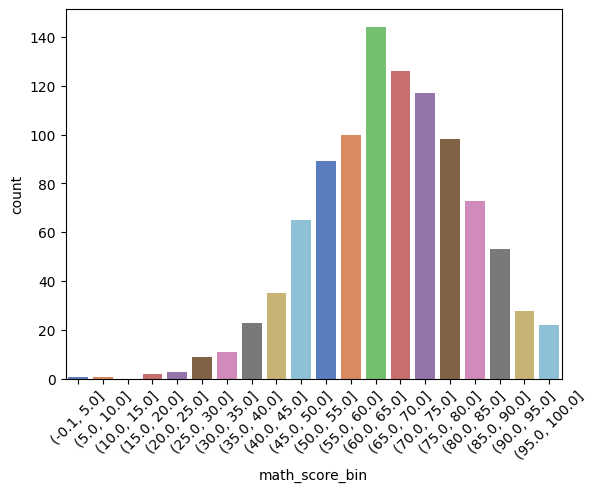

In [10]:
df['math_score_bin'] = pd.cut(df['math score'], bins=20)
p = sns.countplot(x="math_score_bin", data=df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=45)
plt.show()

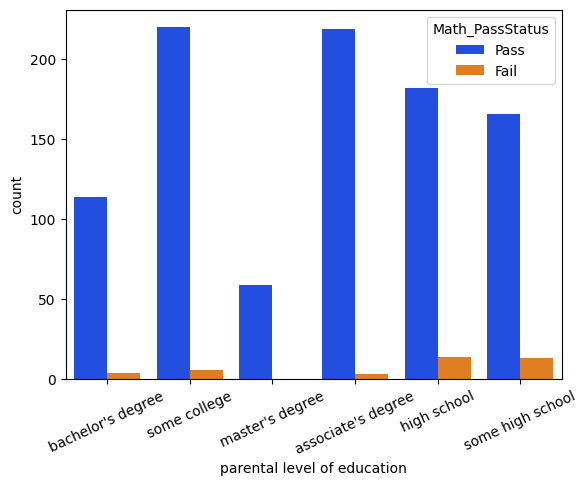

In [11]:
df['Math_PassStatus'] = np.where(df['math score'] >= passing_score, 'Pass', 'Fail')

# Now plot
p = sns.countplot(x='parental level of education', data=df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=25)
plt.show()

C:\Users\SubudhiK\AppData\Local\Temp\ipykernel_5536\1032408500.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="reading score", data = df, palette="muted")


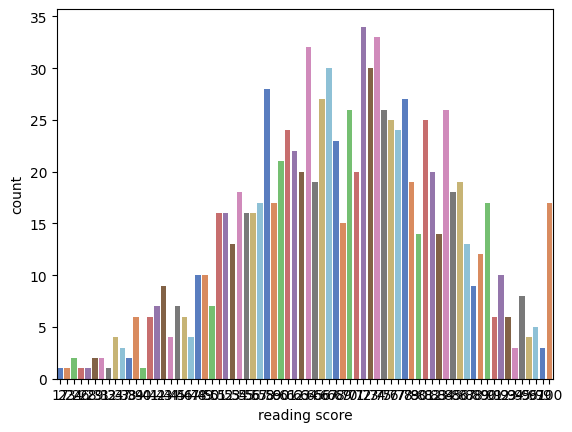

In [12]:
sns.countplot(x="reading score", data = df, palette="muted")
plt.show()

In [13]:
df['Reading_PassStatus'] = np.where(df['reading score']<passing_score, 'F', 'P')
df.Reading_PassStatus.value_counts()

Reading_PassStatus
P    974
F     26
Name: count, dtype: int64

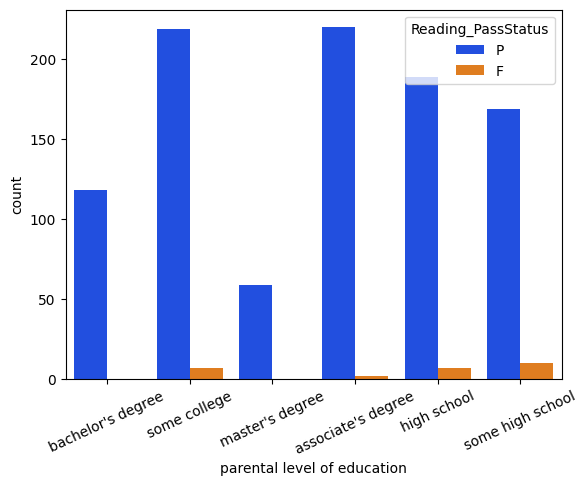

In [14]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=25) 
plt.show()

C:\Users\SubudhiK\AppData\Local\Temp\ipykernel_5536\2547230447.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(x="writing score", data = df, palette="muted")


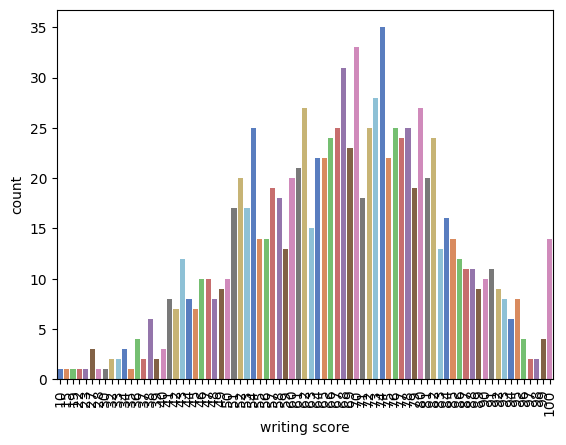

In [15]:
p = sns.countplot(x="writing score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

In [16]:
df['Writing_PassStatus'] = np.where(df['writing score']<passing_score, 'F', 'P')
df.Writing_PassStatus.value_counts()

Writing_PassStatus
P    968
F     32
Name: count, dtype: int64

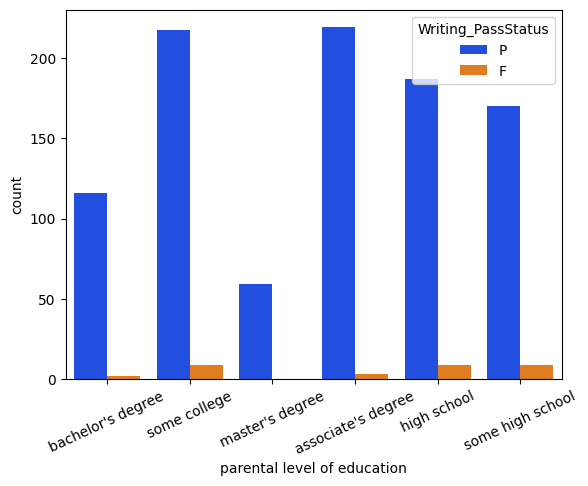

In [17]:
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=25) 
plt.show()

In [18]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

OverAll_PassStatus
P    967
F     33
Name: count, dtype: int64

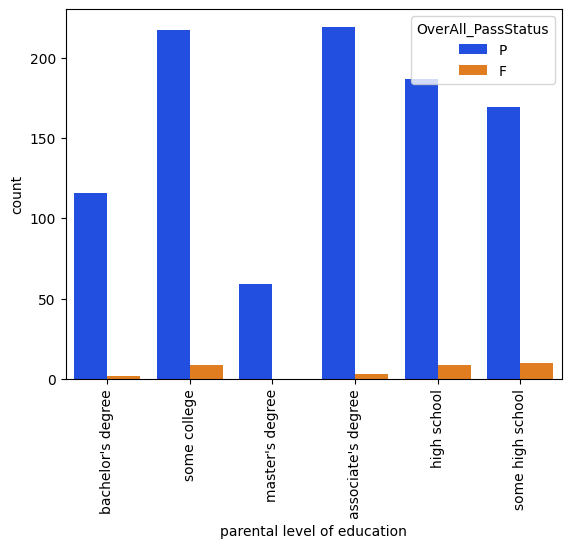

In [19]:
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)
plt.show()

In [20]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

C:\Users\SubudhiK\AppData\Local\Temp\ipykernel_5536\3492302850.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.countplot(x="Percentage", data = df, palette="muted")


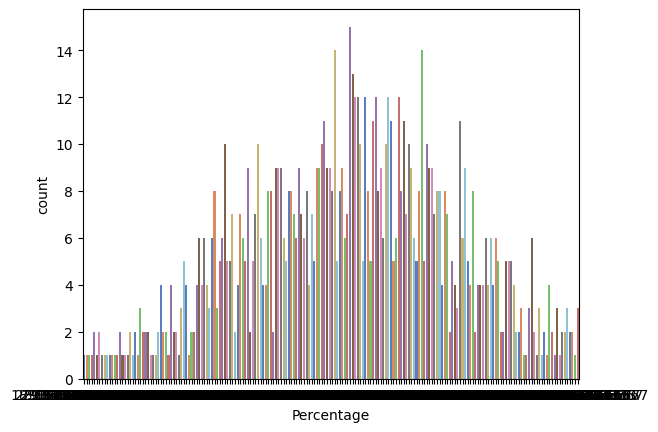

In [21]:
p = sns.countplot(x="Percentage", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=0) 
plt.show()

In [22]:
def get_grade(percentage, over_all_pass_status):
    if ( over_all_pass_status == 'F'):
        return 'F'    
    if ( percentage >= 80 ):
        return 'A'
    if ( percentage >= 70):
        return 'B'
    if ( percentage >= 60):
        return 'C'
    if ( percentage >= 50):
        return 'D'
    if ( percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : get_grade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

Grade
B    261
C    256
A    198
D    182
E     67
F     36
Name: count, dtype: int64

C:\Users\SubudhiK\AppData\Local\Temp\ipykernel_5536\923253345.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")


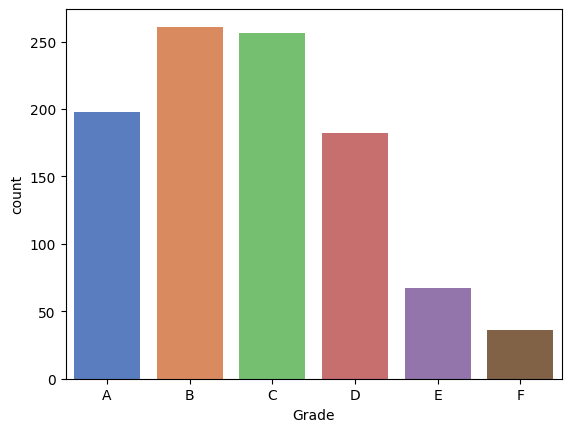

In [23]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

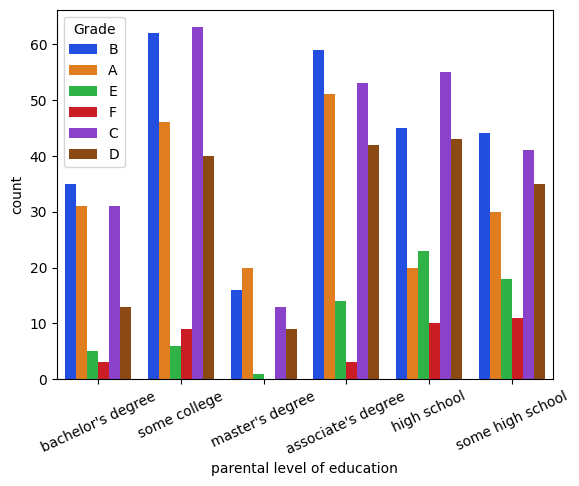

In [24]:
p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=25) 
plt.show()

In [25]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical variables
df_model = df.copy()
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
df_model = pd.get_dummies(df_model, columns=categorical_cols)

# Target: Predict Percentage (regression task)
non_numeric_cols = ['Grade', 'Percentage', 'math_score_bin', 'Math_PassStatus', 'Reading_PassStatus', 'Writing_PassStatus', 'OverAll_PassStatus']
X = df_model.drop(non_numeric_cols, axis=1, errors='ignore')
y = df_model['Percentage']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))



Mean Squared Error: 1.1291754997333562e-28
R2 Score: 1.0
